   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
<ipython-input-1-79980285bda1>:33: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata_subset.layers["counts"] = adata_subset.X.copy()  # Preserve raw counts


AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'
Cluster distribution at selected time point:
 cluster
Erythrocyte 1                  768
Goblet cell                    614
Epidermis                      233
Erythrocyte 4                  198
Myeloid 1                      164
Erythrocyte 3                   57
Sclerotome                      56
Myeloid 2                       52
Beta ionocyte                   51
Spinal cord progenitor          40
Myotome                         31
Vulnerable Motor Neuron         26
ROCs                            21
Erythrocyte 2                   20
Mesenchyme                      14
Alpha ionocyte                  14
Lymphoid 2 (Cxcr6+)             13
Lymphoid 4 (Gata2+, Gata3-)     13
Interneuron 1                   10
Dopaminergic neurons             8
Dermomyotome                 

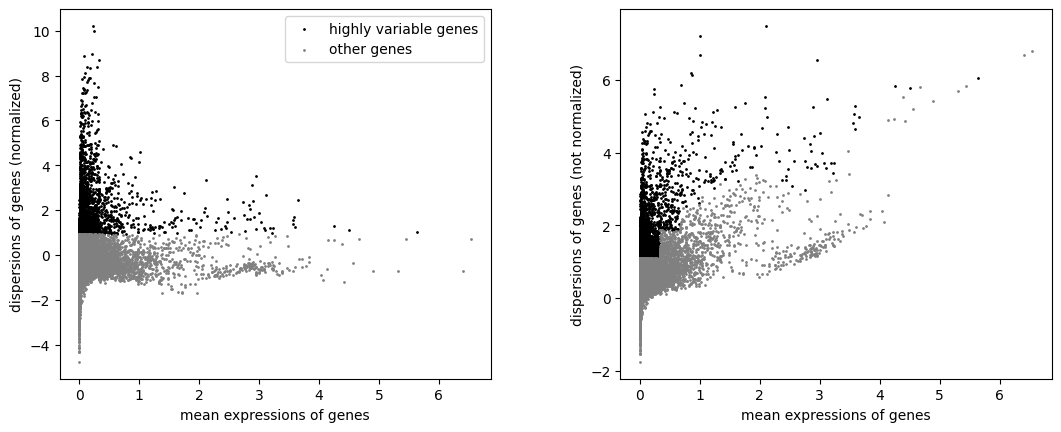

,Top 10 Most Variable Genes,Top 10 Genes with Highest Mean Expression,Top 10 Most Informative Genes (Dispersion),10 Randomly Selected Genes
0,bpi.S,hbd.S,Xelaev18037830m.g,slc6a9.S
1,syp.L,Xelaev18045099m.g,otog.S,zbtb8a.1.L
2,ifnlr1.L,Xelaev18045098m.g,actc1.L,eea1.L
3,frem2.1.L,hbd.L,eln2.L,zdhhc17.S
4,Xelaev18000156m.g,Xelaev18047464m.g,tnn.L,golga7.S
5,Xelaev18000158m.g,Xelaev18047455m.g,mgp.S,robo3.S
6,Xetrov90011021m.L,hbg2.L,myl1.L,myom1.L
7,ctsw.1.L,Xelaev18045083m.g,Xelaev18017166m.g,abhd1.L
8,val,Xetrov90018123m.L,ccl34.L,slc35c1.L
9,Xetrov90027276m.1,Xelaev18022166m.g,sst.S,pnkd.S


First 10 KMeans Cluster Assignments:
   kmeans
0       4
1       3
2       2
3       1
4       2
5       0
6       1
7       1
8       3
9       4


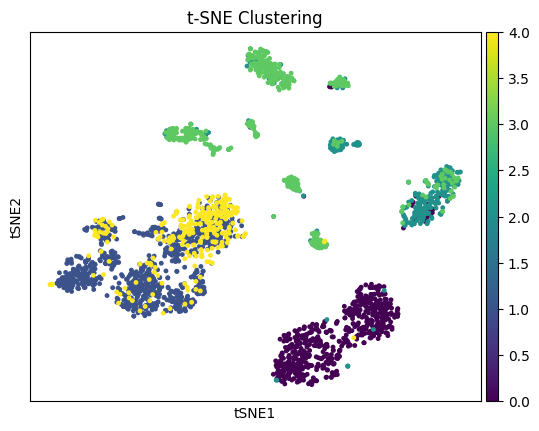

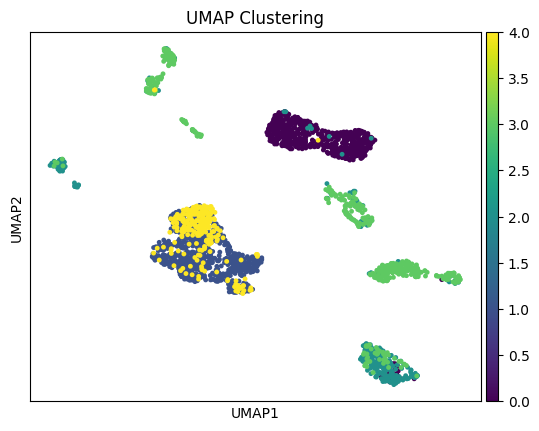


Clustering Metrics:
                         Score
Silhouette Score     0.310699
Adjusted Rand Index  0.551773
Purity Score         0.683678


In [1]:
# Install necessary packages (only needed in Google Colab)
!pip install anndata scanpy matplotlib seaborn scikit-learn

# Import libraries
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from IPython.display import display

# Load the processed dataset
adata_path = "/content/cleaned_processed_frogtail.h5ad"
adata = ad.read_h5ad(adata_path)

# Display dataset summary
print(adata)
adata.obs.head()  # Show metadata_subset
adata.var.head()  # Show gene names

### Step 1: Pick a Time Point/Condition ###
# Select a time point (e.g., 3 day post-amputation)
time_point = 3
adata_subset = adata[adata.obs['DaysPostAmputation'] == time_point]

# Check cluster distribution
print("Cluster distribution at selected time point:\n", adata_subset.obs['cluster'].value_counts())

### Step 2: Quality Control and Normalization (Using Provided Code) ###
adata_subset.layers["counts"] = adata_subset.X.copy()  # Preserve raw counts

# Normalize per cell (column-wise normalization)
sc.pp.normalize_total(adata_subset)
sc.pp.log1p(adata_subset)  # Log transformation

# Gene and cell filtering
sc.pp.filter_genes(adata_subset, min_cells=3)
sc.pp.filter_cells(adata_subset, min_genes=200)

# Select highly variable genes (2300 genes)
sc.pp.highly_variable_genes(adata_subset, n_top_genes=2300)
sc.pl.highly_variable_genes(adata_subset)

### Step 3: Feature Selection ###
# (a) Top 10 most variable genes
top_variable_genes = adata_subset.var[adata_subset.var['highly_variable']].index[:10].tolist()

# (b) Top 10 genes with highest mean expression
top_mean_genes = adata_subset.var['means'].nlargest(10).index.tolist()

# (c) Top 10 most informative genes (based on dispersion)
top_dispersion_genes = adata_subset.var['dispersions_norm'].nlargest(10).index.tolist()

# (d) 10 Random Genes
random_genes = np.random.choice(adata_subset.var_names, 10, replace=False)

# Create a DataFrame to display selected features
feature_selection_df = pd.DataFrame({
    "Top 10 Most Variable Genes": top_variable_genes,
    "Top 10 Genes with Highest Mean Expression": top_mean_genes,
    "Top 10 Most Informative Genes (Dispersion)": top_dispersion_genes,
    "10 Randomly Selected Genes": random_genes
})

display(feature_selection_df)

# Combine all selected genes
selected_genes = top_variable_genes + top_mean_genes + top_dispersion_genes + list(random_genes)

### Step 4(a): K-Means Clustering (K=5) ###
X = adata_subset[:, selected_genes].X.toarray()
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
adata_subset.obs['kmeans'] = kmeans.labels_
print("First 10 KMeans Cluster Assignments:")
print(adata_subset.obs[['kmeans']].head(10))

### Step 4(b): Visualization (t-SNE & UMAP) ###
sc.pp.pca(adata_subset)
sc.pp.neighbors(adata_subset)
sc.tl.tsne(adata_subset)
sc.tl.umap(adata_subset)

# Plot t-SNE
sc.pl.tsne(adata_subset, color='kmeans', title="t-SNE Clustering")

# Plot UMAP
sc.pl.umap(adata_subset, color='kmeans', title="UMAP Clustering")

### Step 4(c): Clustering Evaluation Metrics ###
# Extract true and predicted cluster labels
true_labels = adata_subset.obs['cluster'].astype(str).values
predicted_labels = adata_subset.obs['kmeans'].astype(int).values

# Compute Silhouette Score
silhouette = silhouette_score(X, predicted_labels)

# Compute Adjusted Rand Index (ARI)
ari = adjusted_rand_score(true_labels, predicted_labels)

# Compute Purity Score
def purity_score(y_true, y_pred):
    contingency_matrix = pd.crosstab(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)

purity = purity_score(true_labels, predicted_labels)

# Display clustering metrics
clustering_results = {
    "Silhouette Score": silhouette,
    "Adjusted Rand Index": ari,
    "Purity Score": purity
}

results_df = pd.DataFrame.from_dict(clustering_results, orient='index', columns=['Score'])
print("\nClustering Metrics:\n", results_df)

PCA Without Scaling - Variance Explained:
Principal Component  Variance Explained
                PC1            0.822049
                PC2            0.068811
                PC3            0.030543
                PC4            0.020847
                PC5            0.007923
                PC6            0.006940
                PC7            0.005011
                PC8            0.004250
                PC9            0.003526
               PC10            0.003386

PCA Without Scaling - First 5 Rows:
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10
 5.780236  0.023087 -2.856680 -1.481720  0.064902  0.177385 -0.035790  0.229971  0.165656  0.076459
-4.585521 -3.732081  0.652783 -0.045777  1.040239 -0.172796 -0.691019 -0.078334 -0.093124 -0.292353
-4.900159 -1.820968 -1.110410  0.497548  0.097552 -0.937580  0.599850  0.085656  0.051941 -0.043311
 6.556948  0.909793  0.043626 -0.215306 -0.545849 -0.712952 -0.858845  0.094363  

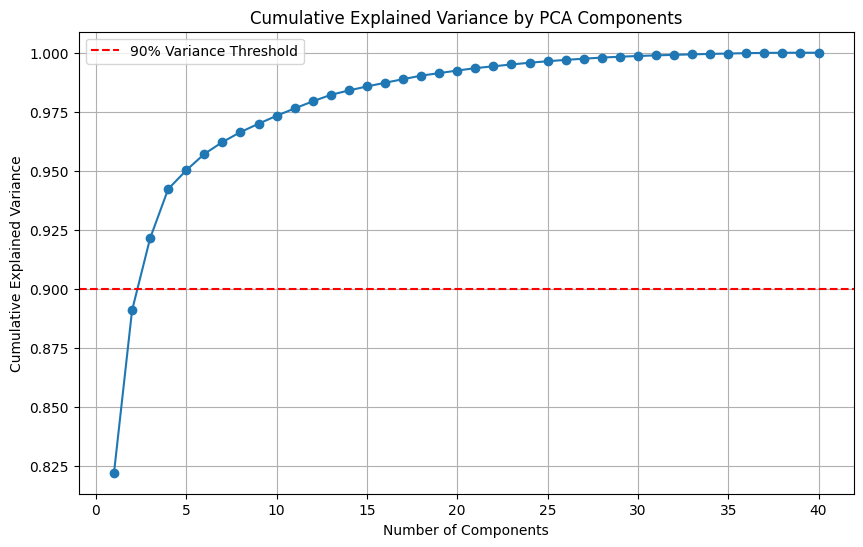

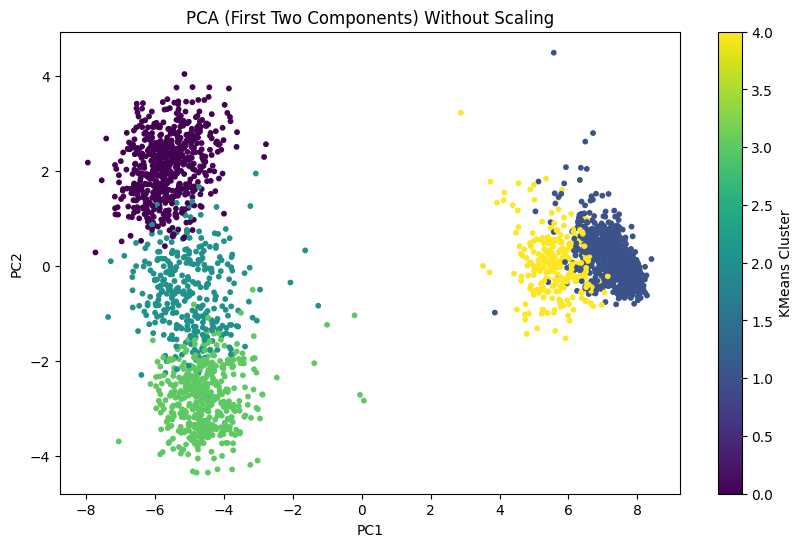

In [2]:
from sklearn.decomposition import PCA

# Subset the data to the selected genes
X = adata_subset[:, selected_genes].X.toarray()

# Determine the maximum possible number of components
n_components = min(X.shape[0], X.shape[1], 50)  # Ensure we don't exceed the data limits

# Apply PCA without scaling (adjusted number of components)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a DataFrame for variance explained
explained_variance = pca.explained_variance_ratio_
variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Variance Explained": explained_variance
})

# Display variance explained (first 10 PCs)
print("PCA Without Scaling - Variance Explained:")
print(variance_df.head(10).to_string(index=False))

# Create DataFrame for first 5 rows of PCA results
pca_df = pd.DataFrame(X_pca[:, :10], columns=[f"PC{i+1}" for i in range(10)])
print("\nPCA Without Scaling - First 5 Rows:")
print(pca_df.head().to_string(index=False))

# Compute cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance explained by first 5 PCs:", cumulative_variance[:5])

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% Variance Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot with first two PCs and KMeans cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=adata_subset.obs['kmeans'], cmap='viridis', s=10)
plt.colorbar(scatter, label="KMeans Cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (First Two Components) Without Scaling")
plt.show()


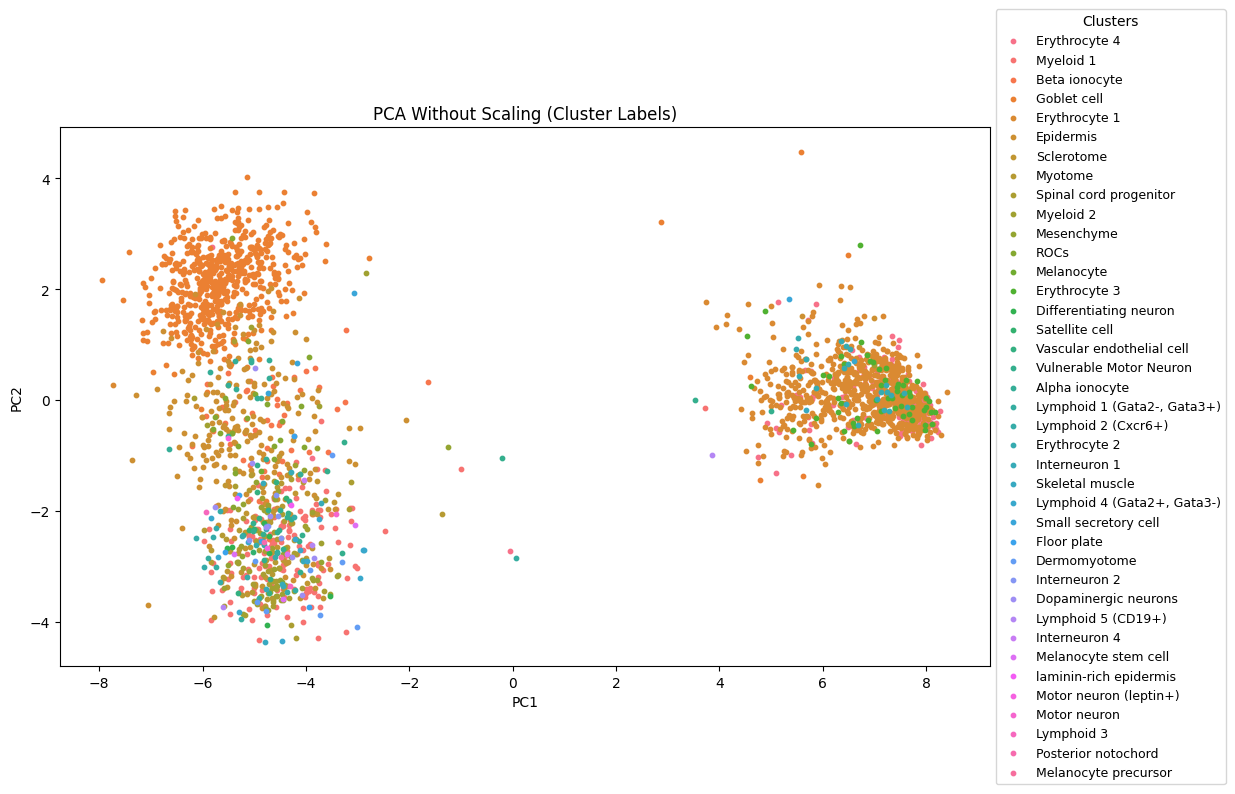

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'cluster' labels are mapped to colors
unique_clusters = adata_subset.obs['cluster'].unique()
palette = sns.color_palette("husl", len(unique_clusters))
cluster_colors = dict(zip(unique_clusters, palette))

# Convert subset index to a list of integers
subset_indices = adata_subset.obs.index.to_list()  # Ensure index is properly formatted for indexing

# Create scatter plot
plt.figure(figsize=(12, 7))
for cluster, color in cluster_colors.items():
    subset = adata_subset.obs[adata_subset.obs['cluster'] == cluster]

    # Convert index labels to integer positions
    subset_indices = [adata_subset.obs.index.get_loc(idx) for idx in subset.index]

    plt.scatter(X_pca[subset_indices, 0], X_pca[subset_indices, 1],
                label=cluster, color=color, s=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Without Scaling (Cluster Labels)")

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Clusters", fontsize=9)
plt.show()

PCA With Scaling - First 5 Rows:
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10      PC11      PC12      PC13      PC14      PC15      PC16      PC17      PC18     PC19      PC20      PC21      PC22      PC23      PC24      PC25      PC26      PC27      PC28      PC29      PC30      PC31      PC32      PC33      PC34      PC35      PC36      PC37      PC38      PC39      PC40
 2.897300 -0.045305  0.035749 -0.044056 -0.083545 -0.009165 -0.097562 -0.017140  0.037786 -0.106832 -0.165259 -0.163897 -0.139695 -0.030479 -0.113559 -0.004744  0.064768  0.027629 0.155386 -0.045963 -0.156210 -0.056146  0.014106 -0.095659 -0.035957 -0.068845  0.039102  0.069476  0.063886 -0.250232 -1.434034  0.042818  0.033348  0.062021  0.092762 -0.032199  0.015027  0.077585 -0.197003 -0.095686
-1.977406  0.018637  0.137776 -0.213778  0.954451 -0.584860 -1.236859 -0.813895  0.192613 -0.012498  0.626385 -0.668089 -0.662651 -0.366761  0.118884 -0.221896 -0.013153

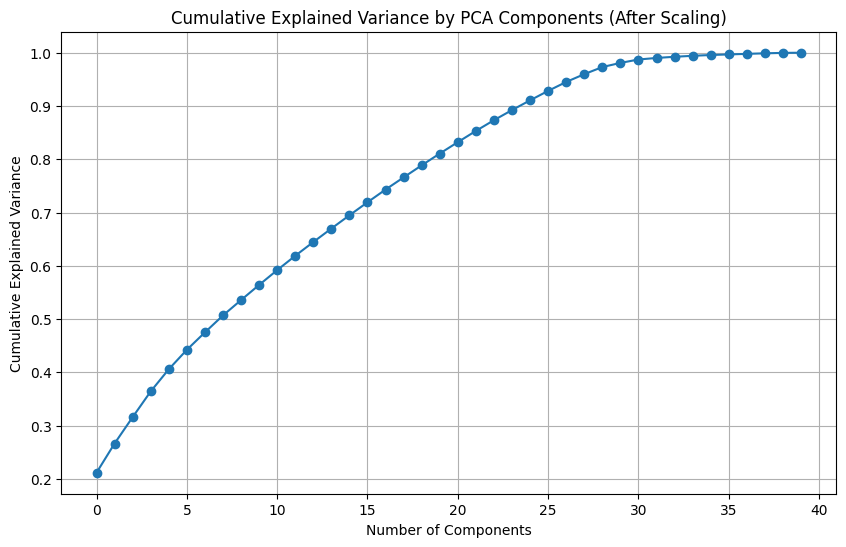

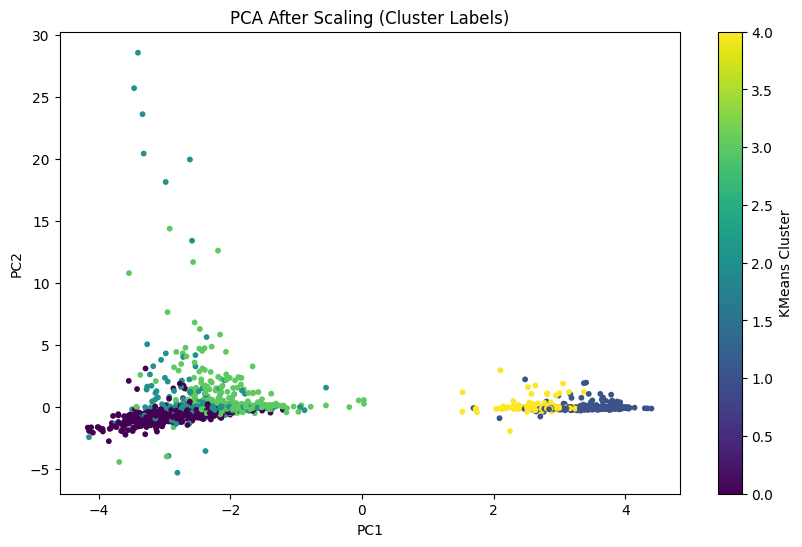

PCA After Scaling - Variance Explained:
Principal Component  Variance Explained
                PC1            0.211405
                PC2            0.054829
                PC3            0.049510
                PC4            0.048345
                PC5            0.041593
                PC6            0.036483
                PC7            0.032731
                PC8            0.031791
                PC9            0.028860
               PC10            0.028428
Cumulative variance explained by first 5 PCs (After Scaling): [0.21140492 0.26623397 0.31574394 0.36408884 0.4056823 ]


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(adata_subset[:, selected_genes].X.toarray())

# Apply PCA after scaling
n_components = min(X_scaled.shape[0], X_scaled.shape[1])
pca_scaled = PCA(n_components=n_components)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)  # Fit PCA properly

# Display first 5 rows of PCA results after scaling
print("PCA With Scaling - First 5 Rows:")
pd.set_option("display.float_format", "{:.6f}".format)
print(pd.DataFrame(X_pca_scaled[:5], columns=[f'PC{i+1}' for i in range(X_pca_scaled.shape[1])]).to_string(index=False))

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_), marker='o')  # Now it will work
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components (After Scaling)')
plt.grid()
plt.show()

# Scatter plot of first two PCs with cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=adata_subset.obs['kmeans'], cmap='viridis', s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA After Scaling (Cluster Labels)')
plt.colorbar(label='KMeans Cluster')
plt.show()

# Compute explained variance ratio
explained_variance_scaled = pca_scaled.explained_variance_ratio_

# Display variance explained (first 10 PCs)
variance_df_scaled = pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance_scaled))],
    "Variance Explained": explained_variance_scaled
})

print("PCA After Scaling - Variance Explained:")
print(variance_df_scaled.head(10).to_string(index=False))

# Cumulative variance explained
cumulative_variance_scaled = np.cumsum(explained_variance_scaled)
print("Cumulative variance explained by first 5 PCs (After Scaling):", cumulative_variance_scaled[:5])


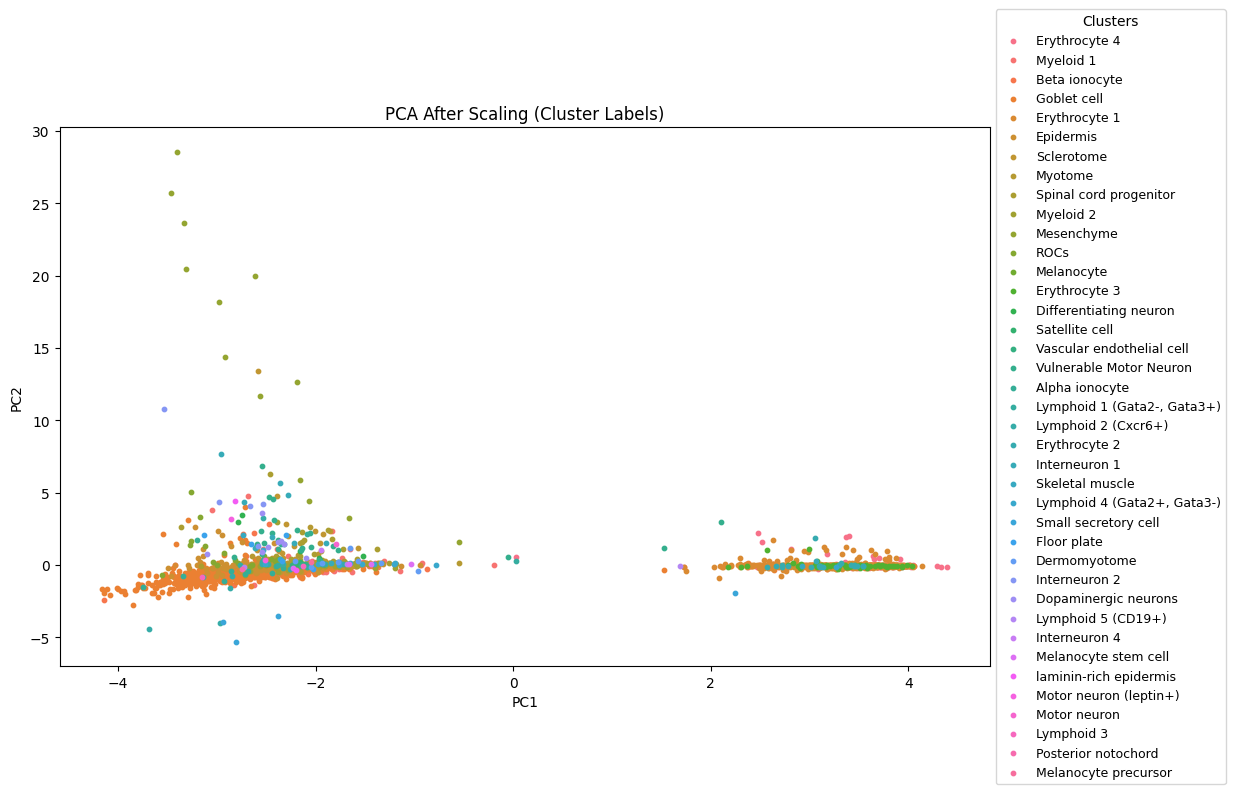

In [5]:
# Ensure 'cluster' labels are mapped to colors
unique_clusters = adata_subset.obs['cluster'].unique()
palette = sns.color_palette("husl", len(unique_clusters))
cluster_colors = dict(zip(unique_clusters, palette))

# Convert subset index to a list of integers
subset_indices = adata_subset.obs.index.to_list()  # Ensure index is properly formatted for indexing

# Create scatter plot for PCA after scaling
plt.figure(figsize=(12, 7))
for cluster, color in cluster_colors.items():
    subset = adata_subset.obs[adata_subset.obs['cluster'] == cluster]

    # Convert index labels to integer positions
    subset_indices = [adata_subset.obs.index.get_loc(idx) for idx in subset.index]

    plt.scatter(X_pca_scaled[subset_indices, 0], X_pca_scaled[subset_indices, 1],
                label=cluster, color=color, s=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA After Scaling (Cluster Labels)")

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Clusters", fontsize=9)
plt.show()


In [6]:
# Define cluster mapping (update with actual cluster assignments)
cluster_labels = {
    "0": "Regeneration Organizing Cell (ROC)",
    "1": "Epidermis",
    "2": "Goblet Cell",
    "3": "Melanocyte",
    "4": "Melanocyte Precursor",
    "5": "Melanocyte Stem Cell",
    "6": "Small Secretory Cell",
    "7": "Laminin-rich Epidermis",
    "8": "Smooth Muscle",
    "9": "Skeletal Muscle",
    "10": "Differentiating Myocyte",
    "11": "Satellite Cell",
    "12": "Vascular Endothelial Cell",
    "13": "Lymphoid Endothelial Cell",
    "14": "Syndetome",
    "15": "Sclerotome",
}

# Assign cluster labels to the dataset
adata_subset.obs["biological_cluster"] = adata_subset.obs["kmeans"].astype(str).map(cluster_labels)

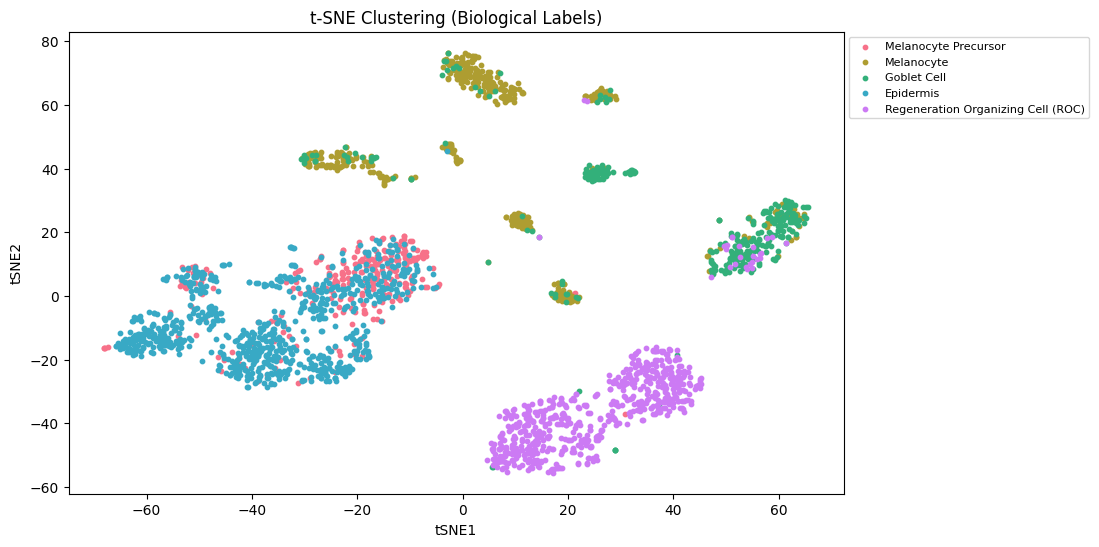

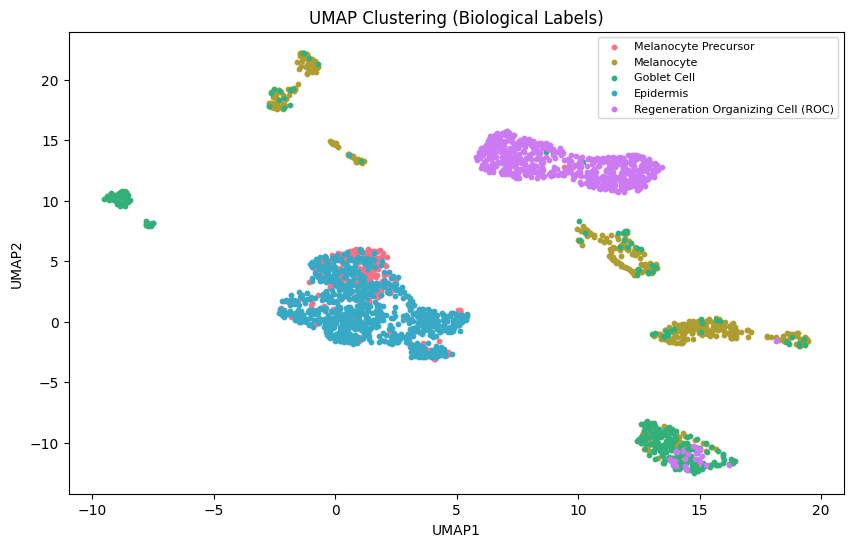

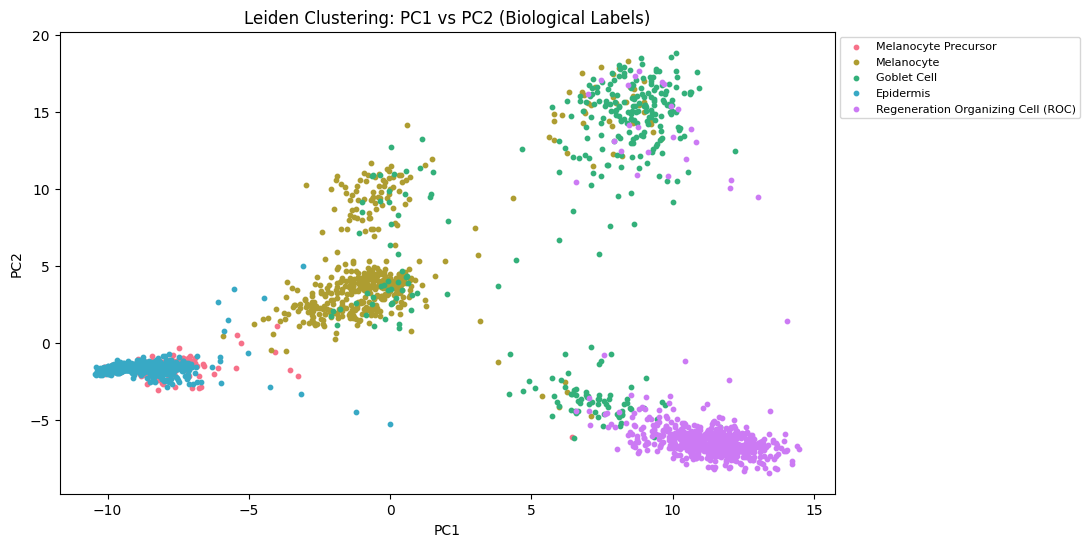

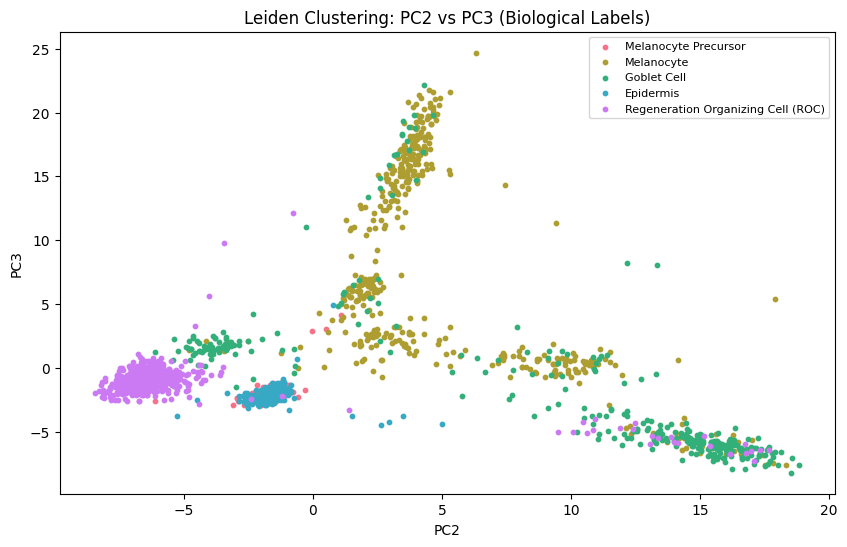

In [7]:
import seaborn as sns

# Define colors for each biological cluster
unique_labels = adata_subset.obs["biological_cluster"].unique()
palette = sns.color_palette("husl", len(unique_labels))
label_color_mapping = dict(zip(unique_labels, palette))

# Plot t-SNE with biological labels
plt.figure(figsize=(10, 6))
for label, color in label_color_mapping.items():
    subset = adata_subset[adata_subset.obs["biological_cluster"] == label]
    plt.scatter(subset.obsm["X_tsne"][:, 0], subset.obsm["X_tsne"][:, 1], label=label, color=color, s=10)

plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("t-SNE Clustering (Biological Labels)")
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1, 1))
plt.show()

# Plot UMAP with biological labels
plt.figure(figsize=(10, 6))
for label, color in label_color_mapping.items():
    subset = adata_subset[adata_subset.obs["biological_cluster"] == label]
    plt.scatter(subset.obsm["X_umap"][:, 0], subset.obsm["X_umap"][:, 1], label=label, color=color, s=10)

plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP Clustering (Biological Labels)")
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1, 1))
plt.show()

# Plot Leiden Clustering (PC1 vs PC2) with biological labels
plt.figure(figsize=(10, 6))
for label, color in label_color_mapping.items():
    subset = adata_subset[adata_subset.obs["biological_cluster"] == label]
    plt.scatter(subset.obsm["X_pca"][:, 0], subset.obsm["X_pca"][:, 1], label=label, color=color, s=10)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Leiden Clustering: PC1 vs PC2 (Biological Labels)")
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1, 1))
plt.show()

# Plot Leiden Clustering (PC2 vs PC3) with biological labels
plt.figure(figsize=(10, 6))
for label, color in label_color_mapping.items():
    subset = adata_subset[adata_subset.obs["biological_cluster"] == label]
    plt.scatter(subset.obsm["X_pca"][:, 1], subset.obsm["X_pca"][:, 2], label=label, color=color, s=10)

plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("Leiden Clustering: PC2 vs PC3 (Biological Labels)")
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1, 1))
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00


<ipython-input-10-99ec08c5bb06>:15: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_subset, resolution=0.5)


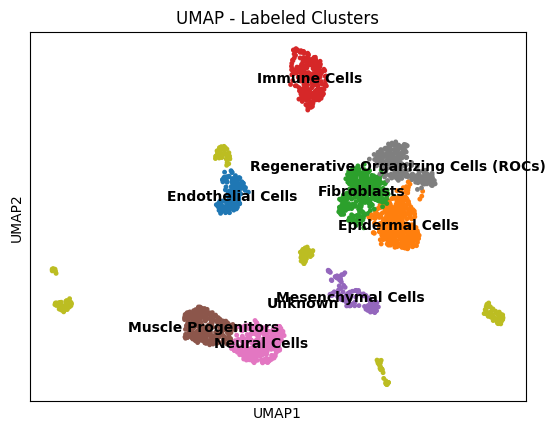

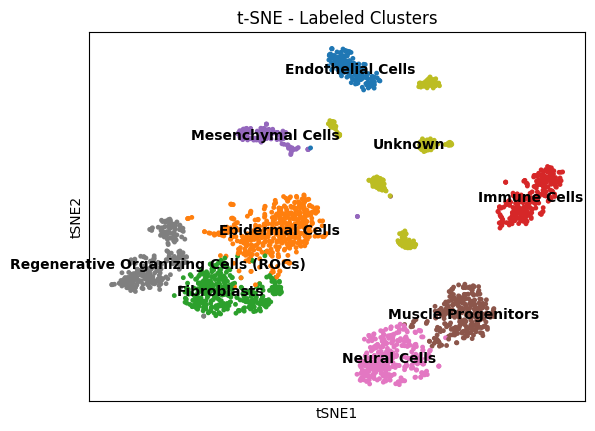

In [10]:
# Install necessary packages if not already installed
!pip install python-igraph louvain
!pip install leidenalg

import scanpy as sc
import pandas as pd

# Perform PCA for dimensionality reduction
sc.tl.pca(adata_subset, n_comps=50)

# Compute nearest neighbors for graph-based clustering
sc.pp.neighbors(adata_subset, n_neighbors=15, n_pcs=40)

# Apply Leiden clustering
sc.tl.leiden(adata_subset, resolution=0.5)
adata_subset.obs["leiden"] = adata_subset.obs["leiden"].astype(str)

# Apply Louvain clustering
sc.tl.louvain(adata_subset, resolution=0.5)
adata_subset.obs["louvain"] = adata_subset.obs["louvain"].astype(str)

# Define meaningful labels for clusters
cluster_labels = {
    "0": "Epidermal Cells",
    "1": "Fibroblasts",
    "2": "Neural Cells",
    "3": "Muscle Progenitors",
    "4": "Regenerative Organizing Cells (ROCs)",
    "5": "Immune Cells",
    "6": "Endothelial Cells",
    "7": "Mesenchymal Cells",
    "8": "Unknown",
    "9": "Unknown",
    "10": "Unknown",
    "11": "Unknown",
    "12": "Unknown",
    "13": "Unknown"
}

# Map labels to clusters
adata_subset.obs["Cluster Label"] = adata_subset.obs["leiden"].map(cluster_labels)
adata_subset.obs["Cluster Label"] = adata_subset.obs["Cluster Label"].astype("category")

# Visualize results using UMAP and t-SNE
sc.tl.umap(adata_subset)
sc.tl.tsne(adata_subset)

# Plot UMAP and t-SNE with cluster labels
sc.pl.umap(adata_subset, color="Cluster Label", title="UMAP - Labeled Clusters", legend_loc="on data")
sc.pl.tsne(adata_subset, color="Cluster Label", title="t-SNE - Labeled Clusters", legend_loc="on data")

In [11]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Compute metrics for different clustering algorithms
labels_kmeans = adata_subset.obs["kmeans"].astype(int)
labels_leiden = adata_subset.obs["leiden"].astype(int)
labels_louvain = adata_subset.obs["louvain"].astype(int)

X_cluster = adata_subset.obsm["X_pca"]  # Use PCA-reduced data for metric calculation

# Compute clustering metrics
metrics_results = {
    "K-Means Silhouette Score": silhouette_score(X_cluster, labels_kmeans),
    "Leiden Silhouette Score": silhouette_score(X_cluster, labels_leiden),
    "Louvain Silhouette Score": silhouette_score(X_cluster, labels_louvain),
    "Adjusted Rand Index (Leiden)": adjusted_rand_score(labels_kmeans, labels_leiden),
    "Adjusted Rand Index (Louvain)": adjusted_rand_score(labels_kmeans, labels_louvain),
    "Normalized Mutual Information (Leiden)": normalized_mutual_info_score(labels_kmeans, labels_leiden),
    "Normalized Mutual Information (Louvain)": normalized_mutual_info_score(labels_kmeans, labels_louvain),
}

# Convert results to DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient="index", columns=["Score"])
display(metrics_df)

,Score
K-Means Silhouette Score,0.136795
Leiden Silhouette Score,0.276090
Louvain Silhouette Score,0.265524
Adjusted Rand Index (Leiden),0.400512
Adjusted Rand Index (Louvain),0.405708
Normalized Mutual Information (Leiden),0.594037
Normalized Mutual Information (Louvain),0.599088


In [12]:
supp_table_path = "/content/Supplementary_Table 3.xlsx"
supp_table = pd.ExcelFile(supp_table_path)
roc_marker_genes_df = supp_table.parse("ROC markers")

# Extract ROC marker genes as a list
roc_marker_genes = roc_marker_genes_df.iloc[:, 0].tolist()
roc_marker_genes = [gene.lower() for gene in roc_marker_genes]  # Convert to lowercase for comparison

# Identify top marker genes using logistic regression
sc.tl.rank_genes_groups(adata_subset, groupby="leiden", method="logreg")

# Extract top ROC marker genes
roc_markers = pd.DataFrame(adata_subset.uns["rank_genes_groups"]["names"]).head(10)
display(roc_markers)

# Compare ROC markers with Supplementary Table 3
common_genes = list(set(roc_markers.iloc[:, 0].str.lower()) & set(roc_marker_genes))
unique_to_study = list(set(roc_markers.iloc[:, 0].str.lower()) - set(roc_marker_genes))
unique_to_table = list(set(roc_marker_genes) - set(roc_markers.iloc[:, 0].str.lower()))

# Display comparison results
comparison_df = pd.DataFrame({
    "Common Genes": common_genes + [None] * (max(len(unique_to_study), len(unique_to_table)) - len(common_genes)),
    "Unique in Study": unique_to_study + [None] * (max(len(unique_to_study), len(unique_to_table)) - len(unique_to_study)),
    "Unique in Supplementary Table 3": unique_to_table + [None] * (max(len(unique_to_study), len(unique_to_table)) - len(unique_to_table))
})

display(comparison_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Xetrov90018123m.L,Xelaev18022531m.g,Xelaev18012141m.g,krt16.S,Xelaev18047462m.g,col1a1.S,crp.4.L,ifitm1.S,tuba1b.L,Xelaev18020998m.g,krt8.S,mpo.L,loc100493999.like.L,slc26a2.2.L
1,nmrk2.L,Xelaev18022529m.g,umod.2.L,krt16.L,Xelaev18045082m.g,col1a1.L,MGC75752.S,Xelaev18036372m.g,stmn2.L,Xelaev18017743m.g,loc100490646.L,mmp7.L,loc100493999.like.S,slc26a2.2.S
2,loc100494945.L,ifitm3.S,Xelaev18015037m.g,Xelaev18034081m.g,Xelaev18047460m.g,lum.L,loc100485744.L,col3a1.S,tubb2b.S,Xelaev18020203m.g,krt19.L,prss57.L,arhgdib.L,atp6v1b1.L
3,MGC75752.S,Xetrov90011359m.L,Xelaev18012120m.g,loc100494945.L,Xelaev18047453m.g,apoe.S,Xelaev18018927m.g,nid1.S,stmn2.S,Xelaev18041411m.g,krt18.S,slurp1l.S,ctsl.L,msln.L
4,rfesd.L,alas2.S,Xelaev18014965m.g,Xelaev18045649m.g,loc100486734.like.L,col1a2.S,unnamed.L.13,cyr61.L,calm2.L,cystm1.L,hes5.1.S,prtn3.S,Xelaev18018852m.g,azin2.S
5,loc100494945.S,hbg2.L,loc100127564.L,azin2.S,ube2c.S,c2orf40.L,loc100487364.L,twist1.L,tubb3.L,Xelaev18045363m.g,hes5.2.L,epx.L,ccl5.S,tpte2.L
6,Xelaev18017217m.g,sesn1.L,loc100490489.L,loc100494945.S,Xelaev18038180m.g,krt12.L,psap.S,cd81.S,tuba1b.S,tmem72.L,loc100490646.S,loc101732654.like.L,Xelaev18039168m.g,atp6v0c.L
7,Xelaev18035533m.g,Xelaev18045098m.g,krt12.S,Xelaev18040854m.g,nmral1.S,sparc.S,loc100496720.L,twist1.S,mllt11.L,loc100494945.L,crip1.L,mmp9.S,ccl5.L,atp6ap1.1.S
8,ca2.L,hbd.S,krt12.L,ly6g6c.L,cdk1.L,Xelaev18016080m.g,basp1.S,id3.L,sncb.L,upk3a.L,krt18.L,prss57.S,gzmh.S,Xelaev18040968m.g
9,prdx2.L,Xelaev18002241m.g,loc101732853.L,Xetrov90018123m.L,Xelaev18045095m.g,lum.S,c1qa.L,vim.L,mllt11.S,loc100495848.S,fabp7.L,loc100486192.L,rgs1.S,ly6g6c.L


,Common Genes,Unique in Study,Unique in Supplementary Table 3
0,None,mgc75752.s,lef1
1,None,nmrk2.l,fgf9
2,None,loc100494945.s,xelaev18044182m
3,None,prdx2.l,loc100486832
4,None,loc100494945.l,loc100493805
5,None,xelaev18017217m.g,jchain
6,None,rfesd.l,loc100492954
7,None,xetrov90018123m.l,robo4
8,None,ca2.l,lpar3
9,None,xelaev18035533m.g,loc100498358
